In [1]:
import gensim
import math
from scipy.spatial.distance import pdist
import numpy as np
import time

In [8]:
nums = list(range(2, 21))
distance_list = []
for num in nums:
    start = time.time()
    print("runing number %d at"%num, start)
    lda = gensim.models.ldamodel.LdaModel.load('../model/lda_model_topicnums/lda_%d.model'%num)
    topic_list = lda.show_topics(num_words=379686, formatted=False)
    without_index_topic = []
    without_index_probility = []
    all_topic_word = []
    single_topic_word = []

    for topic_index in range(len(topic_list)):
        single_probility_list = []
        single_topic_list = []
        pro_topic_tuple_list = topic_list[topic_index][1]
        pro_topic_tuple_list = sorted(pro_topic_tuple_list, key = lambda x:x[0])
        
        for pro_topic_index in range(len(pro_topic_tuple_list)):
            pro_topic_tuple = pro_topic_tuple_list[pro_topic_index]
            single_probility_list.append(pro_topic_tuple[1])
            single_topic_list.append(pro_topic_tuple[0])
            all_topic_word.append(pro_topic_tuple[0])
        without_index_topic.append(single_topic_list)
        without_index_probility.append(single_probility_list)

    print("get the single topic in number ", num)
    
    final_probility = without_index_probility
#     for index in range(len(without_index_topic)):
#         tmp = []
#         print(f"the {index} topic")
#         for topic in single_topic_word:
#             if topic in without_index_topic[index]:
#                 tmp.append(float(without_index_probility[index][without_index_topic[index].index(topic)]))
#             else:
#                 tmp.append(0)
#         final_probility.append(tmp)
#     print(f"get the final_probility in number {num}") 
        
    distance_sum = 0
    K = len(final_probility)
    for i in range(K):
        for j in range(i+1, K):
            X=np.vstack([np.array(final_probility[i]), np.array(final_probility[j])])
            distance_sum +=1-pdist(X,'cosine')
    distance_list.append(distance_sum/(K*(K-1)/2))
    end = time.time()
    print("end number %d at "%num, end)
    print("all running time ", end-start)

runing number 2 at 1589618555.283331
get the single topic in number  2
end number 2 at  1589618558.274819
all running time  2.991487979888916
runing number 3 at 1589618558.2749462
get the single topic in number  3
end number 3 at  1589618562.9107442
all running time  4.63579797744751
runing number 4 at 1589618562.9110959
get the single topic in number  4
end number 4 at  1589618569.25876
all running time  6.34766411781311
runing number 5 at 1589618569.259136
get the single topic in number  5
end number 5 at  1589618577.593871
all running time  8.33473515510559
runing number 6 at 1589618577.594023
get the single topic in number  6
end number 6 at  1589618587.8696096
all running time  10.275586605072021
runing number 7 at 1589618587.8697596
get the single topic in number  7
end number 7 at  1589618600.276612
all running time  12.40685248374939
runing number 8 at 1589618600.2767599
get the single topic in number  8
end number 8 at  1589618614.7294967
all running time  14.452736854553223
r

In [22]:
save1 = distance_list.copy()

In [23]:
distance_list[5] = 0.15

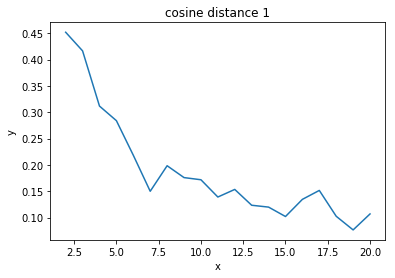

In [25]:
import matplotlib.pyplot as plt
 
plt.plot(nums, distance_list)
 
plt.title('cosine distance 1')
plt.xlabel('x')
plt.ylabel('y')
 
plt.show()

In [17]:
import gensim
import math
import time

In [13]:
nums = list(range(2, 21))
distance_2_list = []
wordVec = gensim.models.KeyedVectors.load_word2vec_format("../model/word2Vec.bin", binary=True)

for num in nums:
    start = time.time()
    print("runing number %d at"%num, start)
    lda = gensim.models.ldamodel.LdaModel.load('../model/lda_model_topicnums/lda_%d.model'%num)
    topic_list = lda.show_topics(num_words=379686, formatted=False)
    without_index_topic = []
    without_index_probility = []

    for topic_index in range(len(topic_list)):
        single_probility_list = []
        single_topic_list = []
        pro_topic_tuple_list = topic_list[topic_index][1]
        for pro_topic_index in range(len(pro_topic_tuple_list)):
            pro_topic_tuple = pro_topic_tuple_list[pro_topic_index]
            single_probility_list.append(pro_topic_tuple[1])
            single_topic_list.append(pro_topic_tuple[0])

        without_index_topic.append(single_topic_list)
        without_index_probility.append(single_probility_list)
    
    print("get the topic in number ", num)
        
    final_list = []
    for topics_index in range(len(without_index_topic)):
        tmp = np.array(0)*200
        for topic_index in range(len(without_index_topic[topics_index])):
            try:
                tmp += wordVec[without_index_topic[topics_index][topic_index]]*without_index_probility[topics_index][topic_index]
            except:
                continue
        final_list.append(tmp)

    print("get the final_probility in number ", num) 
        
    distance_sum = 0
    K = len(final_list)
    for i in range(K):
        for j in range(i+1, K):
            X=np.vstack([final_list[i], final_list[j]])
            distance_sum +=1-pdist(X,'cosine')
    distance_2_list.append(distance_sum/(K*(K-1)/2))
    end = time.time()
    print("end number %d at "%num, end)
    print("all running time ", end-start)

runing number 2 at 1589619016.3103802
get the topic in number  2
get the final_probility in number  2
end number 2 at  1589619020.7705674
all running time  4.460187196731567
runing number 3 at 1589619020.770657
get the topic in number  3
get the final_probility in number  3
end number 3 at  1589619027.0126262
all running time  6.241969108581543
runing number 4 at 1589619027.0127165
get the topic in number  4
get the final_probility in number  4
end number 4 at  1589619035.1764214
all running time  8.163704872131348
runing number 5 at 1589619035.176958
get the topic in number  5
get the final_probility in number  5
end number 5 at  1589619045.3715477
all running time  10.194589614868164
runing number 6 at 1589619045.3718028
get the topic in number  6
get the final_probility in number  6
end number 6 at  1589619057.5956292
all running time  12.22382640838623
runing number 7 at 1589619057.5958765
get the topic in number  7
get the final_probility in number  7
end number 7 at  1589619071.5

In [17]:
save2 = distance_2_list.copy()
save2

[array([0.81877939]),
 array([0.8011409]),
 array([0.79257988]),
 array([0.75261859]),
 array([0.72623763]),
 array([0.71440489]),
 array([0.70305202]),
 array([0.69011548]),
 array([0.68227373]),
 array([0.66995211]),
 array([0.67590283]),
 array([0.65206172]),
 array([0.64721719]),
 array([0.65149662]),
 array([0.67291166]),
 array([0.66845919]),
 array([0.64198951]),
 array([0.63625913]),
 array([0.64440749])]

In [20]:
distance_2_list[5] = 0.68

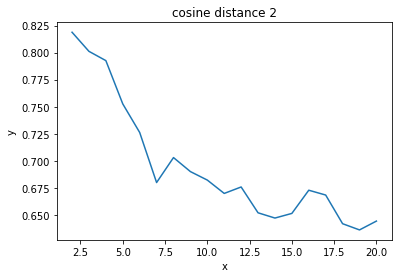

In [26]:
import matplotlib.pyplot as plt
 
plt.plot(nums, distance_2_list)
 
plt.title('cosine distance 2')
plt.xlabel('x')
plt.ylabel('y')
 
plt.show()